In [1]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
from torch import nn

In [2]:
# Transforms images to a PyTorch Tensor
tensor_transform = transforms.ToTensor()
 
# Download the MNIST Dataset
dataset = datasets.MNIST(root = "./data",
                         train = True,
                         download = False,
                         transform = tensor_transform)
 
# DataLoader is used to load the dataset
# for training
loader = torch.utils.data.DataLoader(dataset = dataset,
                                     batch_size = 64,
                                     shuffle = True)

In [3]:
class AE(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784,128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 36),
            nn.ReLU(),
            nn.Linear(36, 18),
            nn.ReLU(),
            nn.Linear(18, 9),
        )

        self.decoder = nn.Sequential(
            nn.Linear(9,18),
            nn.ReLU(),
            nn.Linear(18,36),
            nn.ReLU(),
            nn.Linear(36,64),
            nn.ReLU(),
            nn.Linear(64,128),
            nn.ReLU(),
            nn.Linear(128,784),
            torch.nn.Sigmoid()
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [4]:
# Model Initialization
model = AE()
 
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
 
# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-1,
                             weight_decay = 1e-8)

In [5]:
epochs = 20
outputs = []
losses = []
for epoch in range(epochs):
    print(f"epoch {epoch:02d}")
    for (image, _) in loader:
       
      # Reshaping the image to (-1, 784)
      image = image.reshape(-1, 28*28)
       
      # Output of Autoencoder
      reconstructed = model(image)
       
      # Calculating the loss function
      loss = loss_function(reconstructed, image)
       
      # The gradients are set to zero,
      # the gradient is computed and stored.
      # .step() performs parameter update
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
       
      # Storing the losses in a list for plotting
      losses.append(loss)
    
    outputs.append((epochs, image, reconstructed))

epoch 00
epoch 01
epoch 02
epoch 03
epoch 04
epoch 05
epoch 06
epoch 07
epoch 08
epoch 09
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19


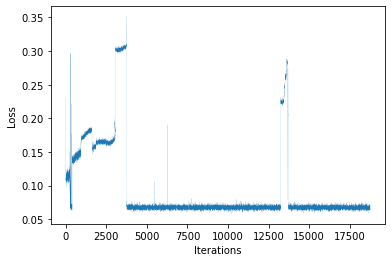

In [6]:
# Plotting
with torch.no_grad():
    plt.cla()
    plt.plot(losses, lw=0.1)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    

Text(0.5, 1.0, 'Predictions')

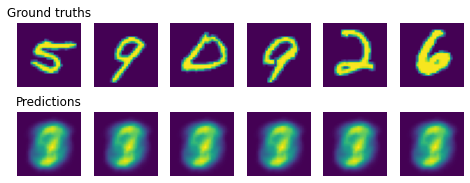

In [8]:
with torch.no_grad():
    n = 6
    fig, ax = plt.subplots(2,n, figsize= [8,3])
    for (image, _) in loader:
        pred = model(image.reshape(-1, 28*28))
        for i in range(n):
            # s = torch.randint(0,64,[]).item()
            plt.axes(ax[0,i])
            plt.imshow(image[i,0,:])
            plt.axis('off')
            plt.axes(ax[1,i])
            plt.imshow(pred[i,:].view(28,28))
            plt.axis('off')
        break
plt.axes(ax[0,0])
plt.title("Ground truths")

plt.axes(ax[1,0])
plt.title("Predictions")